In [1]:
import matplotlib.pyplot as plt
from matplotlib import *
import pandas as pd
import numpy as np

## Loading data

In [8]:
data = np.array([[1,2],[3,4],[2.5,4],[1.5,2.5],[3,5],[2.8,4.5],[2.5,4.5],[1.2,2.5],[1,3],[1,5],[1,2.5],[5,6],[4,3]])
data

array([[1. , 2. ],
       [3. , 4. ],
       [2.5, 4. ],
       [1.5, 2.5],
       [3. , 5. ],
       [2.8, 4.5],
       [2.5, 4.5],
       [1.2, 2.5],
       [1. , 3. ],
       [1. , 5. ],
       [1. , 2.5],
       [5. , 6. ],
       [4. , 3. ]])

In [3]:
df = pd.DataFrame(x, columns=['x', 'y'])
df

,x,y
0,1.0,2.0
1,3.0,4.0
2,2.5,4.0
3,1.5,2.5
4,3.0,5.0
5,2.8,4.5
6,2.5,4.5
7,1.2,2.5
8,1.0,3.0
9,1.0,5.0


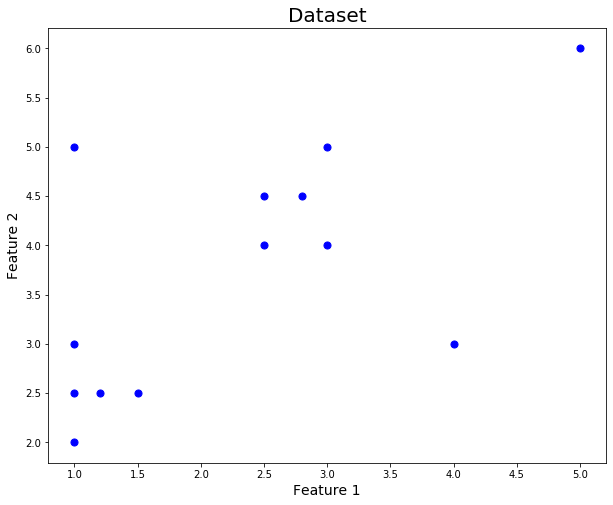

In [4]:
plt.figure(figsize=(10,8))
plt.scatter(df["x"],df["y"],s=50,color='b')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

## My DBSCAN_implementation

In [5]:
# class DBSCAN():
#     """A density based clustering method that expands clusters from 
#     samples that have more neighbors within a radius specified by eps
#     than the value min_samples.
#     Parameters:
    
#     eps: float
#         The radius within which samples are considered neighbors
#     min_samples: int
#         The number of neighbors required for the sample to be a core point. 
#     """
    
#     def __init__(self, eps=1, min_samples=5):
#         self.eps = eps
#         self.min_samples = min_samples

#     def _get_neighbors(self, sample_i):
#         """ Return a list of indexes of neighboring samples
#         A sample_2 is considered a neighbor of sample_1 if the distance between
#         them is smaller than epsilon """
#         neighbors = []
#         idxs = np.arange(len(self.X))
#         for i, _sample in enumerate(self.X[idxs != sample_i]):
#             distance = euclidean_distance(self.X[sample_i], _sample)
#             if distance < self.eps:
#                 neighbors.append(i)
#         return np.array(neighbors)

#     def _expand_cluster(self, sample_i, neighbors):
#         """ Recursive method which expands the cluster until we have reached the border
#         of the dense area (density determined by eps and min_samples) """
#         cluster = [sample_i]
#         # Iterate through neighbors
#         for neighbor_i in neighbors:
#             if not neighbor_i in self.visited_samples:
#                 self.visited_samples.append(neighbor_i)
#                 # Fetch the sample's distant neighbors (neighbors of neighbor)
#                 self.neighbors[neighbor_i] = self._get_neighbors(neighbor_i)
#                 # Make sure the neighbor's neighbors are more than min_samples
#                 # (If this is true the neighbor is a core point)
#                 if len(self.neighbors[neighbor_i]) >= self.min_samples:
#                     # Expand the cluster from the neighbor
#                     expanded_cluster = self._expand_cluster(
#                         neighbor_i, self.neighbors[neighbor_i])
#                     # Add expanded cluster to this cluster
#                     cluster = cluster + expanded_cluster
#                 else:
#                     # If the neighbor is not a core point we only add the neighbor point
#                     cluster.append(neighbor_i)
#         return cluster

#     def _get_cluster_labels(self):
#         #Return the samples labels as the index of the cluster in which they are contained
#         # Set default value to number of clusters
#         # Will make sure all outliers have same cluster label
#         labels = np.full(shape=self.X.shape[0], fill_value=len(self.clusters))
#         for cluster_i, cluster in enumerate(self.clusters):
#             for sample_i in cluster:
#                 labels[sample_i] = cluster_i
#         return labels

#     # DBSCAN prediction
#     def predict(self, X):
#         self.X = X
#         self.clusters = []
#         self.visited_samples = []
#         self.neighbors = {}
#         n_samples = np.shape(self.X)[0]
#         # Iterate through samples and expand clusters from them
#         # if they have more neighbors than self.min_samples
#         for sample_i in range(n_samples):
#             if sample_i in self.visited_samples:
#                 continue
#             self.neighbors[sample_i] = self._get_neighbors(sample_i)
#             if len(self.neighbors[sample_i]) >= self.min_samples:
#                 # If core point => mark as visited
#                 self.visited_samples.append(sample_i)
#                 # Sample has more neighbors than self.min_samples => expand
#                 # cluster from sample
#                 new_cluster = self._expand_cluster(
#                     sample_i, self.neighbors[sample_i])
#                 # Add cluster to list of clusters
#                 self.clusters.append(new_cluster)

#         # Get the resulting cluster labels
#         cluster_labels = self._get_cluster_labels()
#         return cluster_labels

Set eps = 0.8, Minpoints = 5


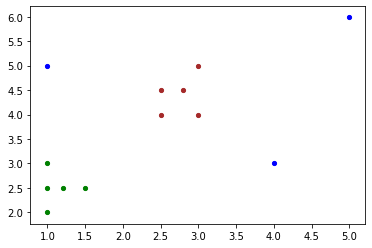

number of cluster found: 2
Counter({1: 5, 2: 5, 0: 3})
numbrer of outliers found: 3



In [23]:
import numpy as np
import collections
import matplotlib.pyplot as plt
import queue
import scipy.io as spio

#Define label for differnt point group
NOISE = 0
UNASSIGNED = 0
core=-1
edge=-2



#function to find all neigbor points in radius
def neighbor_points(data, pointId, radius):
    points = []
    for i in range(len(data)):
        #Euclidian distance using L2 Norm
        if np.linalg.norm(data[i] - data[pointId]) <= radius:
            points.append(i)
    return points

#DB Scan algorithom
def dbscan(data, Eps, MinPt):
    
    #initilize all pointlable to unassign
    pointlabel  = [UNASSIGNED] * len(data)
    pointcount = []
    
    #initilize list for core/noncore point
    corepoint=[]
    noncore=[]
    
    #Find all neigbor for all point
    for i in range(len(data)):
        pointcount.append(neighbor_points(data,i,Eps))
    
    #Find all core point, border and noise
    for i in range(len(pointcount)):
        if (len(pointcount[i])>=MinPt):
            pointlabel[i]=core
            corepoint.append(i)
        else:
            noncore.append(i)

    #To reduce core points          
    for i in noncore:  
        for j in pointcount[i]:
            if j in corepoint:
                pointlabel[i]=edge
                break
            
    #start assigning point to luster
    cl = 1
    
    #Using a Queue to put all neigbor core point in queue and find neigboir's neigbor
    for i in range(len(pointlabel)):
        q = queue.Queue()
        if (pointlabel[i] == core):
            pointlabel[i] = cl
            for x in pointcount[i]:
                if(pointlabel[x]==core):
                    q.put(x)
                    pointlabel[x]=cl
                elif(pointlabel[x]==edge):
                    pointlabel[x]=cl
            #Stop when all point in Queue has been checked   
            while not q.empty():
                neighbors = pointcount[q.get()]
                for y in neighbors:
                    if (pointlabel[y]==core):
                        pointlabel[y]=cl
                        q.put(y)
                    if (pointlabel[y]==edge):
                        pointlabel[y]=cl            
            cl=cl+1 #move to next cluster
    return pointlabel,cl
    
#Function to plot final result 
def plotRes(data, clusterRes, clusterNum):
    nPoints = len(data)
    scatterColors = ['black', 'green', 'brown', 'red', 'purple', 'orange', 'yellow']
    for i in range(clusterNum):
        if (i==0):
            #Plot all noise point as blue
            color='blue'
        else:
            color = scatterColors[i % len(scatterColors)]
        x1 = [];  y1 = []
        for j in range(nPoints):
            if clusterRes[j] == i:
                x1.append(data[j, 0])
                y1.append(data[j, 1])
        plt.scatter(x1, y1, c=color, alpha=1, marker='.', s=70)


        
#Set EPS and Minpoint
eps = 0.8
minpts = 5
# Find ALl cluster, outliers in different setting and print resultsw

print('Set eps = ' +str(eps)+ ', Minpoints = '+str(minpts))
pointlabel,cl = dbscan(data,eps,minpts)
plotRes(data, pointlabel, cl)
plt.show()
print('number of cluster found: ' + str(cl-1))
counter=collections.Counter(pointlabel)
print(counter)
outliers  = pointlabel.count(0)
print('numbrer of outliers found: '+str(outliers) +'\n')

## compare the code with the DBSCAN from the SKLearn.cluster

In [16]:
from sklearn.cluster import DBSCAN


In [17]:
dbscan.labels_

array([ 0,  1,  1,  0,  1,  1,  1,  0,  0, -1,  0, -1, -1], dtype=int64)

C:\Users\Youssef\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


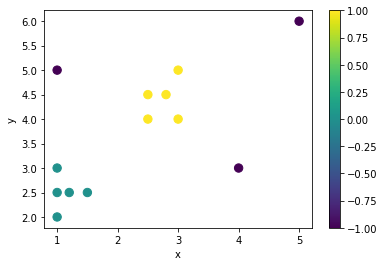

In [19]:
dbscan = DBSCAN(eps=0.8, min_samples=5).fit(df)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df.x, df.y, c=dbscan.labels_, s=70)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
fig.show()

## Resources


http://madhugnadig.com/articles/machine-learning/2017/09/13/implementing-dbscan-from-scratch-in-python-machine-learning.html
    
https://www.mikioharman.com/2020-08-24-dbscan/
    
https://radiant-brushlands-42789.herokuapp.com/towardsdatascience.com/understanding-dbscan-algorithm-and-implementation-from-scratch-c256289479c5
    
https://towardsdatascience.com/understanding-dbscan-algorithm-and-implementation-from-scratch-c256289479c5    